In [ ]:
!pip install Sastrawi tweet-preprocessor textblob wordcloud nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 1. Cleaning Data

In [ ]:
# df = pd.read_csv("/content/MERGE-2017.csv")
# df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,9.470300e+17,Sat Dec 30 09:00:35 +0000 2017,59,Ya Allah aku hanya berharap semoga orangtuaku ...,9.470300e+17,NaN,NaN,in,Japan,1,0,30,https://x.com/SachiCrypto/status/9470296406479...,494092445.0,SachiCrypto
1,9.470600e+17,Sat Dec 30 11:00:39 +0000 2017,46,Doaku hari ini :Bersihkan hatiku dari kebencia...,9.470600e+17,NaN,NaN,in,Japan,1,0,29,https://x.com/SachiCrypto/status/9470598524839...,494092445.0,SachiCrypto
2,9.468790e+17,Fri Dec 29 23:00:55 +0000 2017,25,Tuhan jagalah hati ini perilaku ini dan tutur ...,9.468790e+17,NaN,NaN,in,Japan,0,2,21,https://x.com/SachiCrypto/status/9468787287680...,494092445.0,SachiCrypto
3,9.472410e+17,Sat Dec 30 23:00:43 +0000 2017,33,Ya Allah jagalah hati ini agar semakin teguh b...,9.472410e+17,NaN,NaN,in,Japan,0,2,18,https://x.com/SachiCrypto/status/9472410660167...,494092445.0,SachiCrypto
4,9.467580e+17,Fri Dec 29 15:01:23 +0000 2017,47,Berdoalah meminta lebih besar dari kemampuan K...,9.467580e+17,NaN,NaN,in,Japan,1,0,11,https://x.com/SachiCrypto/status/9467580508405...,494092445.0,SachiCrypto


In [ ]:
import pandas as pd

df = pd.read_csv('/content/bitcoin2024.csv', delimiter=',')

print(df.columns)
df.head()


Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1818094703784669454,Tue Jul 30 01:22:10 +0000 2024,26,Kepolisian Nasional di Kyiv Ukraina telah mena...,1818094703784669454,https://pbs.twimg.com/media/GTsrfj1bUAETljz.jpg,NaN,in,NaN,0,1,0,https://x.com/akademicryptoid/status/181809470...,1673276769355575296,akademicryptoid
1,1817771925181272250,Mon Jul 29 03:59:34 +0000 2024,26,Senator Amerika Serikat Cynthia Lummis telah m...,1817771925181272250,https://pbs.twimg.com/media/GToF7YVagAAHvqV.jpg,NaN,in,NaN,0,1,1,https://x.com/akademicryptoid/status/181777192...,1673276769355575296,akademicryptoid
2,1818779781502320806,Wed Jul 31 22:44:25 +0000 2024,30,Soalnya #Bitcoin sudah memasuki zona support y...,1818779781502320806,https://pbs.twimg.com/media/GT2aklpX0AAvTEk.jpg,NaN,in,MARS,0,6,5,https://x.com/cryptondo/status/181877978150232...,1471393708478058505,cryptondo
3,1818446568430633108,Wed Jul 31 00:40:21 +0000 2024,11,Oke deh.. Bitcoin emang lbh bagus drpd uang fi...,1818446568430633108,https://pbs.twimg.com/media/GTxrhCLXwAAUj__.jpg,NaN,in,Indonesia,0,0,0,https://x.com/aadbitcoin/status/18184465684306...,942323793355194368,aadbitcoin
4,1817712592246468834,Mon Jul 29 00:03:48 +0000 2024,4,Aku terkejut permulaan langkah2 nak tangkap da...,1817712592246468834,https://pbs.twimg.com/media/GTnP9w2bcAAMfr4.jpg,NaN,in,Kuala Lumpur,0,0,4,https://x.com/alif_haidar/status/1817712592246...,289824513,alif_haidar


In [ ]:

df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

df['created_at'] = df['created_at'].dt.date

df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1818094703784669454,2024-07-30,26,Kepolisian Nasional di Kyiv Ukraina telah mena...,1818094703784669454,https://pbs.twimg.com/media/GTsrfj1bUAETljz.jpg,NaN,in,NaN,0,1,0,https://x.com/akademicryptoid/status/181809470...,1673276769355575296,akademicryptoid
1,1817771925181272250,2024-07-29,26,Senator Amerika Serikat Cynthia Lummis telah m...,1817771925181272250,https://pbs.twimg.com/media/GToF7YVagAAHvqV.jpg,NaN,in,NaN,0,1,1,https://x.com/akademicryptoid/status/181777192...,1673276769355575296,akademicryptoid
2,1818779781502320806,2024-07-31,30,Soalnya #Bitcoin sudah memasuki zona support y...,1818779781502320806,https://pbs.twimg.com/media/GT2aklpX0AAvTEk.jpg,NaN,in,MARS,0,6,5,https://x.com/cryptondo/status/181877978150232...,1471393708478058505,cryptondo
3,1818446568430633108,2024-07-31,11,Oke deh.. Bitcoin emang lbh bagus drpd uang fi...,1818446568430633108,https://pbs.twimg.com/media/GTxrhCLXwAAUj__.jpg,NaN,in,Indonesia,0,0,0,https://x.com/aadbitcoin/status/18184465684306...,942323793355194368,aadbitcoin
4,1817712592246468834,2024-07-29,4,Aku terkejut permulaan langkah2 nak tangkap da...,1817712592246468834,https://pbs.twimg.com/media/GTnP9w2bcAAMfr4.jpg,NaN,in,Kuala Lumpur,0,0,4,https://x.com/alif_haidar/status/1817712592246...,289824513,alif_haidar


In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) # menghapus mention
  text = re.sub(r'#\w+', '', text) # menghapus tag
  text = re.sub(r'RT[\s]+', '', text) # menghapus retweet
  text = re.sub(r'https?://\S+', '', text) #menghapus hyper link

  text = re.sub(r'[^a-zA-Z\s]', '', text) #Menghapus selain alphabet
  text = re.sub(r'\d+', '', text) #menghapus digit angka
  text = re.sub(r'\s+', ' ', text).strip() # menghapus spasi berlebih

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df['full_text'] = df['full_text'].str.lower()

In [ ]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1818094703784669454,2024-07-30,26,kepolisian nasional di kyiv ukraina telah mena...,1818094703784669454,https://pbs.twimg.com/media/GTsrfj1bUAETljz.jpg,NaN,in,NaN,0,1,0,https://x.com/akademicryptoid/status/181809470...,1673276769355575296,akademicryptoid
1,1817771925181272250,2024-07-29,26,senator amerika serikat cynthia lummis telah m...,1817771925181272250,https://pbs.twimg.com/media/GToF7YVagAAHvqV.jpg,NaN,in,NaN,0,1,1,https://x.com/akademicryptoid/status/181777192...,1673276769355575296,akademicryptoid
2,1818779781502320806,2024-07-31,30,soalnya sudah memasuki zona support yg mendeka...,1818779781502320806,https://pbs.twimg.com/media/GT2aklpX0AAvTEk.jpg,NaN,in,MARS,0,6,5,https://x.com/cryptondo/status/181877978150232...,1471393708478058505,cryptondo
3,1818446568430633108,2024-07-31,11,oke deh bitcoin emang lbh bagus drpd uang fiat...,1818446568430633108,https://pbs.twimg.com/media/GTxrhCLXwAAUj__.jpg,NaN,in,Indonesia,0,0,0,https://x.com/aadbitcoin/status/18184465684306...,942323793355194368,aadbitcoin
4,1817712592246468834,2024-07-29,4,aku terkejut permulaan langkah nak tangkap dak...,1817712592246468834,https://pbs.twimg.com/media/GTnP9w2bcAAMfr4.jpg,NaN,in,Kuala Lumpur,0,0,4,https://x.com/alif_haidar/status/1817712592246...,289824513,alif_haidar


# 2. Preprocessing Data
- Normalization: Normalisasi adalah proses mengubah teks menjadi bentuk yang konsisten dan standar. Ini termasuk mengubah huruf besar menjadi huruf kecil, menghapus tanda baca, angka, dan karakter khusus lainnya, serta menangani variasi dalam penulisan kata (misalnya, "USA" menjadi "us").

- Stopwords: Stopwords adalah kata-kata umum yang tidak memberikan informasi penting untuk analisis, seperti "dan," "atau," "tetapi," dll. Proses ini melibatkan penghapusan kata-kata tersebut dari teks untuk mengurangi noise dan fokus pada kata-kata yang lebih bermakna.

- Tokenize: Tokenisasi adalah proses memecah teks menjadi unit-unit kecil, seperti kata atau frasa. Setiap unit ini disebut token. Tokenisasi membantu dalam mengidentifikasi dan memproses setiap elemen teks secara individu.

- Stemming: Stemming adalah proses mengurangi kata ke bentuk dasarnya atau akarnya. Misalnya, kata "running" diubah menjadi "run." Ini membantu dalam menyederhanakan teks dan mengurangi variasi kata yang memiliki makna yang sama.



In [ ]:
# Normalisasi
norm = {"mampus": " mati "," asu ": " anjing "," edan ": " gila "," anjlok ": " turun "," smoga ": " semoga "," smoga ": " semoga ","liat": " lihat ","nak": " ingin ","nge-pump": " harga naik ","hijau": " harga naik ","BURRRRATTTTTT": " meledak ","tnggu": " tunggu ","prlahan": "  perlahan ","pasal": " tentang ","lepastu": " setelah itu ","sangkut": " rugi ","lagiiii": " lagi "," awal2 ": " awal ","macam": " seperti ","pukimak": " bodoh "," gw ": " aku "," tp ": " tapi "," dlu ": " dulu "," lu ": " kamu "," udh ": " sudah "," yg ": " yang ", " saham ":" ", " invest ": " investasi "," thn ": " tahun ", ' nggak ':' tidak ', ' gak ':' tidak ' ,' bangetdari ':' banget dari ','vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ',' ganjarmahfud ':' ganjar mahfud ', ' stylish ':' bergaya ',' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ', ' blokkk ':' goblok ' ,' blokk ':' goblok ' , ' blok ':' goblok ','dhuarrrrr':' hancur ' ,' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ', ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ", " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika '," kirik ": " biadab ", ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ', ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ', ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1818094703784669454,2024-07-30,26,kepolisian nasional di kyiv ukraina telah mena...,1818094703784669454,https://pbs.twimg.com/media/GTsrfj1bUAETljz.jpg,NaN,in,NaN,0,1,0,https://x.com/akademicryptoid/status/181809470...,1673276769355575296,akademicryptoid
1,1817771925181272250,2024-07-29,26,senator amerika serikat cynthia lummis telah m...,1817771925181272250,https://pbs.twimg.com/media/GToF7YVagAAHvqV.jpg,NaN,in,NaN,0,1,1,https://x.com/akademicryptoid/status/181777192...,1673276769355575296,akademicryptoid
2,1818779781502320806,2024-07-31,30,soalnya sudah memasuki zona support yang mende...,1818779781502320806,https://pbs.twimg.com/media/GT2aklpX0AAvTEk.jpg,NaN,in,MARS,0,6,5,https://x.com/cryptondo/status/181877978150232...,1471393708478058505,cryptondo
3,1818446568430633108,2024-07-31,11,oke deh bitcoin emang lbh bagus drpd uang fiat...,1818446568430633108,https://pbs.twimg.com/media/GTxrhCLXwAAUj__.jpg,NaN,in,Indonesia,0,0,0,https://x.com/aadbitcoin/status/18184465684306...,942323793355194368,aadbitcoin
4,1817712592246468834,2024-07-29,4,aku terkejut permulaan langkah ingin tangkap...,1817712592246468834,https://pbs.twimg.com/media/GTnP9w2bcAAMfr4.jpg,NaN,in,Kuala Lumpur,0,0,4,https://x.com/alif_haidar/status/1817712592246...,289824513,alif_haidar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1808840041277292962,2024-07-04,3,gang,1808840041277292962,https://pbs.twimg.com/media/GRpKGQmWMAApv0o.jpg,NaN,in,NaN,1,0,0,https://x.com/superdorvil/status/1808840041277...,813641181607424001,superdorvil
215,1809117858233753967,2024-07-05,3,has never rugged waligis qof san uma galin alx...,1809117858233753967,https://pbs.twimg.com/ext_tw_video_thumb/18091...,NaN,in,NaN,0,1,0,https://x.com/Liban_Bitcoin/status/18091178582...,1346993938972823552,Liban_Bitcoin
216,1809078837374038094,2024-07-05,1,kemarin btc turun di bawah support hingga menc...,1809078837374038094,https://pbs.twimg.com/media/GRsjRv8aUAAz0gC.jpg,NaN,in,NaN,0,1,0,https://x.com/ajaib_investasi/status/180907883...,1166977780757581824,ajaib_investasi
217,1809045897520500854,2024-07-05,5,gn gn bulls,1809045897520500854,https://pbs.twimg.com/media/GRsFkICXsAAn2J4.jpg,NaN,in,NaN,0,0,0,https://x.com/StutubeTrading/status/1809045897...,1001949768065736704,StutubeTrading


In [ ]:
# Stopwords menggunakan library sastrawi
more_stop_words = [
    "di", "yang", "dan", "ke", "dari", "dengan", "pada", "untuk", "adalah",
    "ini", "itu", "atau", "sebagai", "juga", "dalam", "sudah", "tidak",
    "akan", "karena", "tetapi", "oleh", "saat", "bagi", "serta", "hanya",
    "saja", "agar", "seperti", "meskipun", "walaupun"
] # ini adalah tambahan yang ditambahkan

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1818094703784669454,2024-07-30,26,kepolisian nasional kyiv ukraina menangkap emp...,1818094703784669454,https://pbs.twimg.com/media/GTsrfj1bUAETljz.jpg,NaN,in,NaN,0,1,0,https://x.com/akademicryptoid/status/181809470...,1673276769355575296,akademicryptoid
1,1817771925181272250,2024-07-29,26,senator amerika serikat cynthia lummis mengaju...,1817771925181272250,https://pbs.twimg.com/media/GToF7YVagAAHvqV.jpg,NaN,in,NaN,0,1,1,https://x.com/akademicryptoid/status/181777192...,1673276769355575296,akademicryptoid
2,1818779781502320806,2024-07-31,30,soalnya memasuki zona support mendekat harga o...,1818779781502320806,https://pbs.twimg.com/media/GT2aklpX0AAvTEk.jpg,NaN,in,MARS,0,6,5,https://x.com/cryptondo/status/181877978150232...,1471393708478058505,cryptondo
3,1818446568430633108,2024-07-31,11,oke deh bitcoin emang lbh bagus drpd uang fiat...,1818446568430633108,https://pbs.twimg.com/media/GTxrhCLXwAAUj__.jpg,NaN,in,Indonesia,0,0,0,https://x.com/aadbitcoin/status/18184465684306...,942323793355194368,aadbitcoin
4,1817712592246468834,2024-07-29,4,aku terkejut permulaan langkah tangkap dakwa...,1817712592246468834,https://pbs.twimg.com/media/GTnP9w2bcAAMfr4.jpg,NaN,in,Kuala Lumpur,0,0,4,https://x.com/alif_haidar/status/1817712592246...,289824513,alif_haidar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1808840041277292962,2024-07-04,3,gang,1808840041277292962,https://pbs.twimg.com/media/GRpKGQmWMAApv0o.jpg,NaN,in,NaN,1,0,0,https://x.com/superdorvil/status/1808840041277...,813641181607424001,superdorvil
215,1809117858233753967,2024-07-05,3,has never rugged waligis qof san uma galin alx...,1809117858233753967,https://pbs.twimg.com/ext_tw_video_thumb/18091...,NaN,in,NaN,0,1,0,https://x.com/Liban_Bitcoin/status/18091178582...,1346993938972823552,Liban_Bitcoin
216,1809078837374038094,2024-07-05,1,kemarin btc turun bawah support hingga mencapa...,1809078837374038094,https://pbs.twimg.com/media/GRsjRv8aUAAz0gC.jpg,NaN,in,NaN,0,1,0,https://x.com/ajaib_investasi/status/180907883...,1166977780757581824,ajaib_investasi
217,1809045897520500854,2024-07-05,5,gn gn bulls,1809045897520500854,https://pbs.twimg.com/media/GRsFkICXsAAn2J4.jpg,NaN,in,NaN,0,0,0,https://x.com/StutubeTrading/status/1809045897...,1001949768065736704,StutubeTrading


In [ ]:
# # Tokenize
# tokenized = df['full_text'].apply(lambda x:x.split())
# tokenized

,full_text
0,"[allah, aku, berharap, semoga, orangtuaku, terus, diberi, nikmat, sehat]"
1,"[doaku, hari, bersihkan, hatiku, kebencian, sehalus, apa, pada, siapa, mampukan, aku, melupakan, segala, perih, hari]"
2,"[tuhan, jagalah, hati, perilaku, dan, tutur, kata, agar, menyakiti, orang]"
3,"[allah, jagalah, hati, agar, semakin, teguh, berdiri, atas, jalanmu, aamiin]"
4,"[berdoalah, meminta, lebih, besar, kemampuan, sebab, tuhan, maha, pemungkin, apapun, terjadi, atas, ijinnya]"
5,"[tuhan, baikkanlah, karirku, sukseskanlah, bisnis, pribadiku, kayakanlah, aku, indahkanlah, kepatuhanku, kepadamu, aamiin]"
6,"[allah, berikanlah, hamba, petunjuk, selalu, berada, lindunganmu]"
7,"[tuhan, berikan, pintu, maaf, atas, kesalahan, pernah, kuperbuat, kedua, orang, tuaku, ijinkan, aku, membahagiakan, secepatnya]"
8,"[allah, ku, bisa, berdoa, berusaha, terbaik, mendapatkan, aku, inginkan]"
9,"[allah, lindungilah, hamba, sekeluarga, orangorang, berniat, jahat, berikanlah, rezeki, cukup, kami]"


Stemming adalah proses dalam pemrosesan bahasa alami (NLP) yang digunakan untuk mengurangi kata ke bentuk dasarnya atau akar katanya.

In [ ]:
# # Stemming menggunakan library
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()
#   do = []
#   for w in text_cleaning:
#     dt = stemmer.stem(w)
#     do.append(dt)
#   d_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# tokenized = tokenized.apply(stemming)
# tokenized.to_csv("/content/crypto_preprocess_withDate.csv")

allah aku harap moga orangtuaku terus beri nikmat sehat
doa hari sih hati benci halus apa pada siapa mampu aku lupa segala perih hari
tuhan jaga hati perilaku dan tutur kata agar sakit orang
allah jaga hati agar makin teguh diri atas jalan aamiin
doa minta lebih besar mampu sebab tuhan maha mungkin apa jadi atas ijinnya
tuhan baik karirku sukses bisnis pribadi kaya aku indah patuh kepada aamiin
allah beri hamba tunjuk selalu ada lindung
tuhan ikan pintu maaf atas salah pernah buat dua orang tua ijinkan aku bahagia cepat
allah ku bisa doa usaha baik dapat aku ingin
allah lindung hamba keluarga orangorang niat jahat beri rezeki cukup kami
tulis tarik kita hutang a
doa ini terima kasih tuhan atas semua rahmat engkau ikan kepada beri bahagia semua sahabat
percaya tuhan selalu adil tiap keburu ada baik tiap sedih akan muncul bahagia
kah lapang rezeki mudah urus dan lindung ya robb
tuhan limpah dosa hari ampun jika limpah amal hari tambah
doa hari tuhan beri aku sehat kuat aku bantu wujud mi

KeyboardInterrupt: 

In [ ]:
# Mengonversi kolom 'created_at' menjadi format tanggal yang benar
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')
df['created_at'] = df['created_at'].dt.date

# Tokenisasi kolom 'full_text'
df['tokenized'] = df['full_text'].apply(lambda x: x.split())

# Fungsi stemming
def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

# Menerapkan stemming pada kolom 'tokenized'
df['stemmed'] = df['tokenized'].apply(stemming)

# Menyimpan hasil ke CSV
df[['created_at', 'full_text', 'stemmed']].to_csv("/content/crypto_preprocess_withdate.csv", index=False)

print(df[['created_at', 'full_text', 'stemmed']])

     created_at                                          full_text  \
0    2024-07-30  kepolisian nasional kyiv ukraina menangkap emp...   
1    2024-07-29  senator amerika serikat cynthia lummis mengaju...   
2    2024-07-31  soalnya memasuki zona support mendekat harga o...   
3    2024-07-31  oke deh bitcoin emang lbh bagus drpd uang fiat...   
4    2024-07-29  aku terkejut permulaan langkah   tangkap dakwa...   
..          ...                                                ...   
214  2024-07-04                                               gang   
215  2024-07-05  has never rugged waligis qof san uma galin alx...   
216  2024-07-05  kemarin btc turun bawah support hingga mencapa...   
217  2024-07-05                                        gn gn bulls   
218  2024-07-05  rule of thumb aset market cap lebih kecil jauh...   

                                               stemmed  
0    polisi nasional kyiv ukraina tangkap empat ora...  
1    senator amerika serikat cynthia lummis a

In [ ]:
df.dropna(inplace=True)
print(df[['created_at', 'full_text', 'stemmed']])


     created_at                                          full_text  \
56   2019-08-22  Komen mereka tentang cryptocurrency Merah: kom...   
57   2019-08-22  Salah satu moda investasi: Cryptocurrency SALA...   
121  2018-12-10  @weirdogasm @BitFazz @romeogadungan ini argume...   
124  2018-05-31  Kira2 kita sekarang ada di mana? di fase yg ha...   
162  2018-05-24  Jadi ceritanya tahun 2009 Satoshi Nakamoto mem...   
178  2018-04-14  1. Yang kerja di bidang IT pasti tahu apa itu ...   
190  2021-05-30  Masih gak percaya? Nih saya kasih lihat contoh...   
191  2021-05-30  Selama 1000 hari tadi misal dia nggak ndablek ...   
199  2021-02-20  SAHAM BRIS yang katanya lebih besar dari Bitco...   
207  2021-02-20  So in case of Bitcoin (dan crypto lainnya lebi...   
232  2023-05-05  3. Hash Rate Bitcoin: Hash rate merupakan indi...   
246  2022-01-27  Silahkan dilihat harga-harganya ya ya mungkin ...   
248  2022-02-06  Contoh Predictive 2 Bitcoin bisa naik sampai z...   
250  2022-01-27  Ban

# 3. Labeling Data
- Manual dilakuakn oleh team

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 4. EDA Visualization

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data_crawling/LabellingManual/Labbeling_Manual.csv', delimiter=',')  # atau gunakan delimiter=';' jika perlu

# Lihat kolom untuk memastikan data terbaca dengan benar
print(data.columns)
data.head()


Index(['Tweet', 'tweet_english', 'Sentiment'], dtype='object')


,Tweet,tweet_english,Sentiment
0,bitcoin kontol anjing biadab moga mati semua e...,Bitcoin Dog Dog Dogs Hopefully all you died,Negatif
1,bitcoin turun tuh,Bitcoin goes down,Negatif
2,bi bitcoin rupa alat bayar tidak sah,BI Bitcoin forms an invalid payment tool,Negatif
3,bitcoin naik gila turun tiba riskan gitu,"Bitcoin goes crazy down, arriving at risk",Negatif
4,selamat pagi selamat akhir pekan harga bitcoin...,Good morning good weekend the price of Bitcoin...,Negatif


In [ ]:
import pandas as pd

# Menampilkan nilai unik dalam kolom 'Sentiment' untuk memastikan ada 'po'
print(data['Sentiment'].unique())
data.dropna(inplace=True)
data['Sentiment'] = data['Sentiment'].replace(' po', 'Positif')
print(data['Sentiment'].unique())

data.to_csv('sentiment_analysis_results.csv', index=False)

['Negatif' 'Positif' nan]
['Negatif' 'Positif']


In [ ]:
# Memfilter data berdasarkan sentimen
df_negative = data[data['Sentiment'] == "Negatif"]
df_positive = data[data['Sentiment'] == "Positif"]

# Mengonversi kolom 'Tweet' ke daftar
negative_list = df_negative['tweet_english'].tolist()
positive_list = df_positive['tweet_english'].tolist()

# Menggabungkan daftar menjadi string
filtered_negative = "".join(str(negative_list)) # convert the List into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = "".join(str(positive_list)) # convert the List into a string of ham
filtered_positive = filtered_positive.lower()


# Cetak hasil untuk memeriksa
print(filtered_negative)
print(filtered_positive)

['bitcoin dog dog dogs hopefully all you died', 'bitcoin goes down', 'bi bitcoin forms an invalid payment tool', 'bitcoin goes crazy down, arriving at risk', 'good morning good weekend the price of bitcoin natural day is quite a lot down at the altcoin xrp nxt natural market.', 'just bought bitcoin near the top of the day ago you have to be unhappy to sit down today you are', 'buy a lot of bitcoin that bitcoin is missing', 'crypto haram islam pandang panjang cryptocurrency debate there are several cryptocurrency bases consider the main haram of the indonesian ulema council mui gharar uncertainty of crypto value fluctuations are not basic assets', 'buzzwords web blockchain normally cryptocurrency nft yes buzzword even though it comes cuan a lot of stains like scam hack ponzi other big losses know that web blockchain is more', 'face to promote crypto hype products used to go xx capital conference eating a table of people ria promoted cryptocurrency service fuh story all return je', 'cryp

banyaknya data sentimen


Hasil Analisis Data:
Positif = 452
Negatif = 338

Total Data : 790


<ipython-input-5-49765c483a7a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=results_df, palette='viridis')


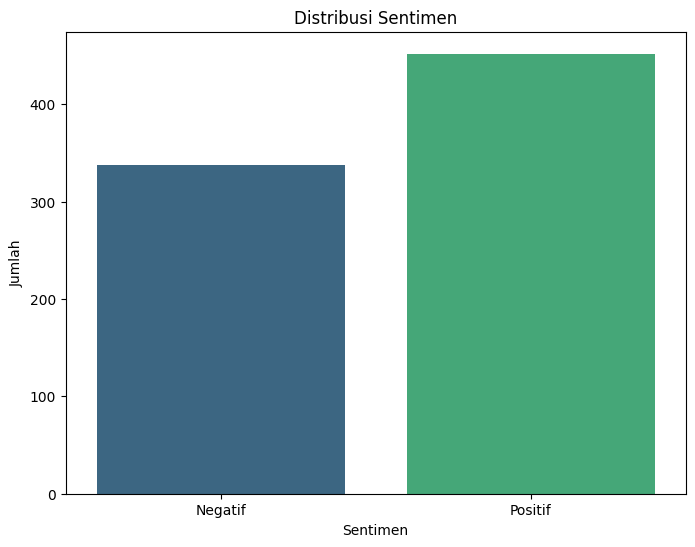

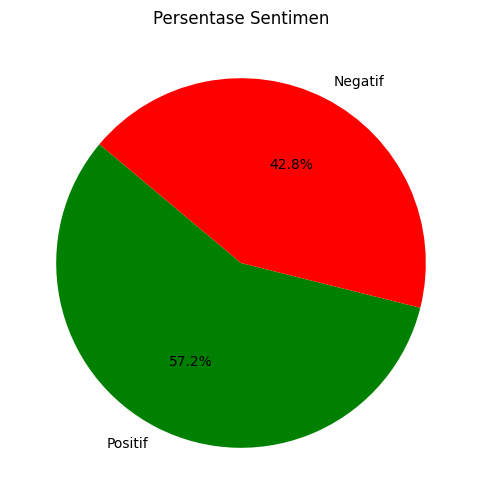

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_tweet = data['tweet_english'].tolist()
status = data['Sentiment'].tolist()

data['Sentiment'] = data['Sentiment'].replace('po', 'Positif')

# Menghitung jumlah sentimen positif dan negatif
total_positif = status.count("Positif")
total_negatif = status.count("Negatif")
total = len(status)

# Print results
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

# Create a DataFrame
results_df = pd.DataFrame({
    'tweet_english': data_tweet,
    'Sentiment': status
})

# Plot distribusi sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=results_df, palette='viridis')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Plot pie chart sentimen
plt.figure(figsize=(8, 6))
results_df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title('Persentase Sentimen')
plt.ylabel('')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

### Negatif plot word

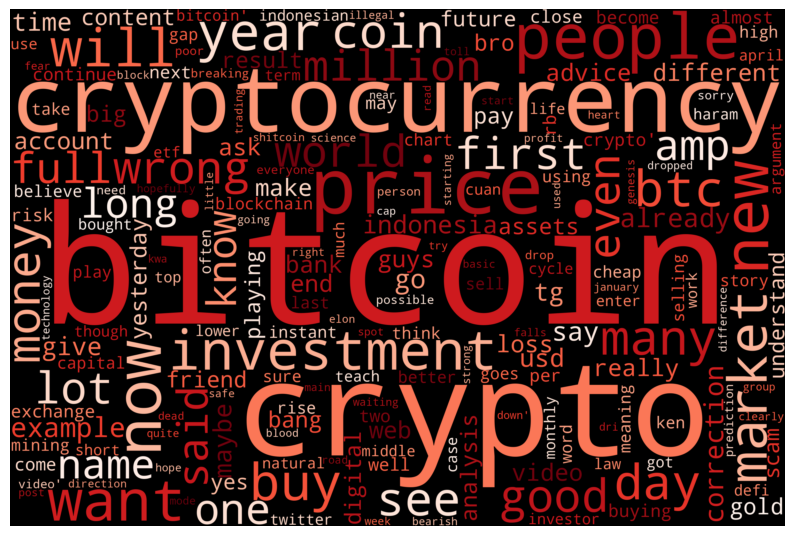

In [ ]:
wordcloud = WordCloud(
  width=3000,
  height=2000,
  random_state=3,
  background_color='black',
  colormap='Reds_r',
  collocations=False,
  stopwords=STOPWORDS
).generate(filtered_negative)

plot_cloud(wordcloud)

### Positif Plot Word

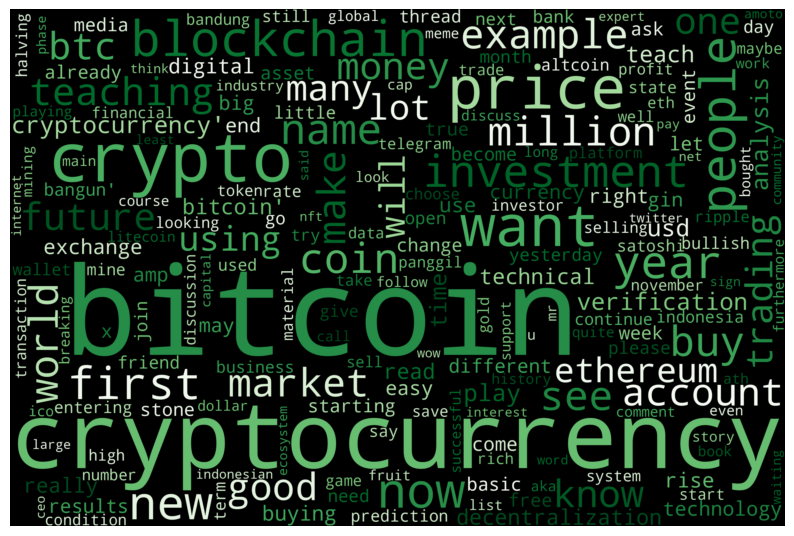

In [ ]:
wordcloud = WordCloud(
  width=3000,
  height=2000,
  random_state=3,
  background_color='black',
  colormap='Greens_r',
  collocations=False,
  stopwords=STOPWORDS
).generate(filtered_positive)

plot_cloud(wordcloud)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Data_crawling/LabellingManual/Labbeling_Manual.csv")

df_cleaned = df.dropna(subset=['Sentiment'])

# Menampilkan DataFrame yang sudah dibersihkan
print(df_cleaned)

                                                 Tweet  \
0    bitcoin kontol anjing biadab moga mati semua e...   
1                                    bitcoin turun tuh   
2                 bi bitcoin rupa alat bayar tidak sah   
3             bitcoin naik gila turun tiba riskan gitu   
4    selamat pagi selamat akhir pekan harga bitcoin...   
..                                                 ...   
785  pasuk fase halving mulai mei bullish uptrend l...   
786  ini prediksi lihat sama tahun cetak jutawan ba...   
787                           beli bitcoin ah eh turun   
788             pasuk fase tanda ini fase segera mulai   
789  klo gitu berani ya lah apbn indonesia investas...   

                                         tweet_english Sentiment  
0          Bitcoin Dog Dog Dogs Hopefully all you died   Negatif  
1                                    Bitcoin goes down   Negatif  
2             BI Bitcoin forms an invalid payment tool   Negatif  
3            Bitcoin goes crazy dow

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# data['created_at'] = pd.to_datetime(data['created_at'], format='%m/%d/%Y')

# data['year'] = data['created_at'].dt.year

# sentiment_count = data.groupby(['year', 'Sentiment']).size().unstack(fill_value=0)

# # Mengatur ukuran plot
# plt.figure(figsize=(12, 8))

# # Menyiapkan posisi bar
# width = 0.4
# positions = range(len(sentiment_count.index))

# # Plotting bar positif
# plt.bar(positions, sentiment_count['Positif'], width=width, align='center', label='Positif')

# # Plotting bar negatif
# plt.bar([p + width for p in positions], sentiment_count['Negatif'], width=width, align='center', label='Negatif')

# # Menambahkan judul dan label sumbu
# plt.title('Jumlah Sentimen per Tahun')
# plt.xlabel('Tahun')
# plt.ylabel('Jumlah Sentimen')

# # Menambahkan label pada sumbu x
# plt.xticks([p + width / 2 for p in positions], sentiment_count.index)

# # Menambahkan legenda
# plt.legend()

# # Menampilkan plot
# plt.show()


# 5. Modeling

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data_crawling/LabellingManual/data_cleaned.csv', delimiter=',')  # atau gunakan delimiter=';' jika perlu

# Lihat kolom untuk memastikan data terbaca dengan benar
print(data.columns)
data.head()


Index(['Tweet', 'tweet_english', 'Sentiment'], dtype='object')


,Tweet,tweet_english,Sentiment
0,bitcoin kontol anjing biadab moga mati semua e...,Bitcoin Dog Dog Dogs Hopefully all you died,Negatif
1,bitcoin turun tuh,Bitcoin goes down,Negatif
2,bi bitcoin rupa alat bayar tidak sah,BI Bitcoin forms an invalid payment tool,Negatif
3,bitcoin naik gila turun tiba riskan gitu,"Bitcoin goes crazy down, arriving at risk",Negatif
4,selamat pagi selamat akhir pekan harga bitcoin...,Good morning good weekend the price of Bitcoin...,Negatif


In [ ]:
# Mengubah daftar kamus menjadi DataFrame
df = pd.DataFrame(data)

Pada langkah ini, teks diubah menjadi vektor angka menggunakan TfidfVectorizer sehingga dapat diproses oleh model machine learning.

### Vaktorisasi [Tfidf]

In [ ]:
# Menginisialisasi vectorizer
vectorizer = TfidfVectorizer()

# Wordembeding/ word2vec tambahan dari bapaknya

X = vectorizer.fit_transform(df['Tweet'])
y = df['Sentiment']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Asumsikan data sudah ada dalam DataFrame 'data'
# data = pd.read_csv('path_to_your_data.csv')

# Pisahkan fitur dan label
X = data['Tweet']
y = data['Sentiment']

# Lakukan TF-IDF vectorization pada fitur teks
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Terapkan SMOTE ke data training
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Periksa distribusi label sebelum dan setelah SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

print("\nDistribusi label setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Distribusi label sebelum SMOTE:
Sentiment
Positif    354
Negatif    278
Name: count, dtype: int64

Distribusi label setelah SMOTE:
Sentiment
Positif    354
Negatif    354
Name: count, dtype: int64


### ini yang lama tapi hasil potingan bagus [Gausa dipake]

---



Distribusi label sebelum SMOTE:
Sentiment
1    354
0    278
Name: count, dtype: int64

Distribusi label setelah SMOTE:
Sentiment
1    354
0    354
Name: count, dtype: int64
Best parameters found:  {'svm__C': 10, 'svm__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        60
           1       0.70      0.85      0.77        98

    accuracy                           0.68       158
   macro avg       0.66      0.63      0.63       158
weighted avg       0.67      0.68      0.67       158



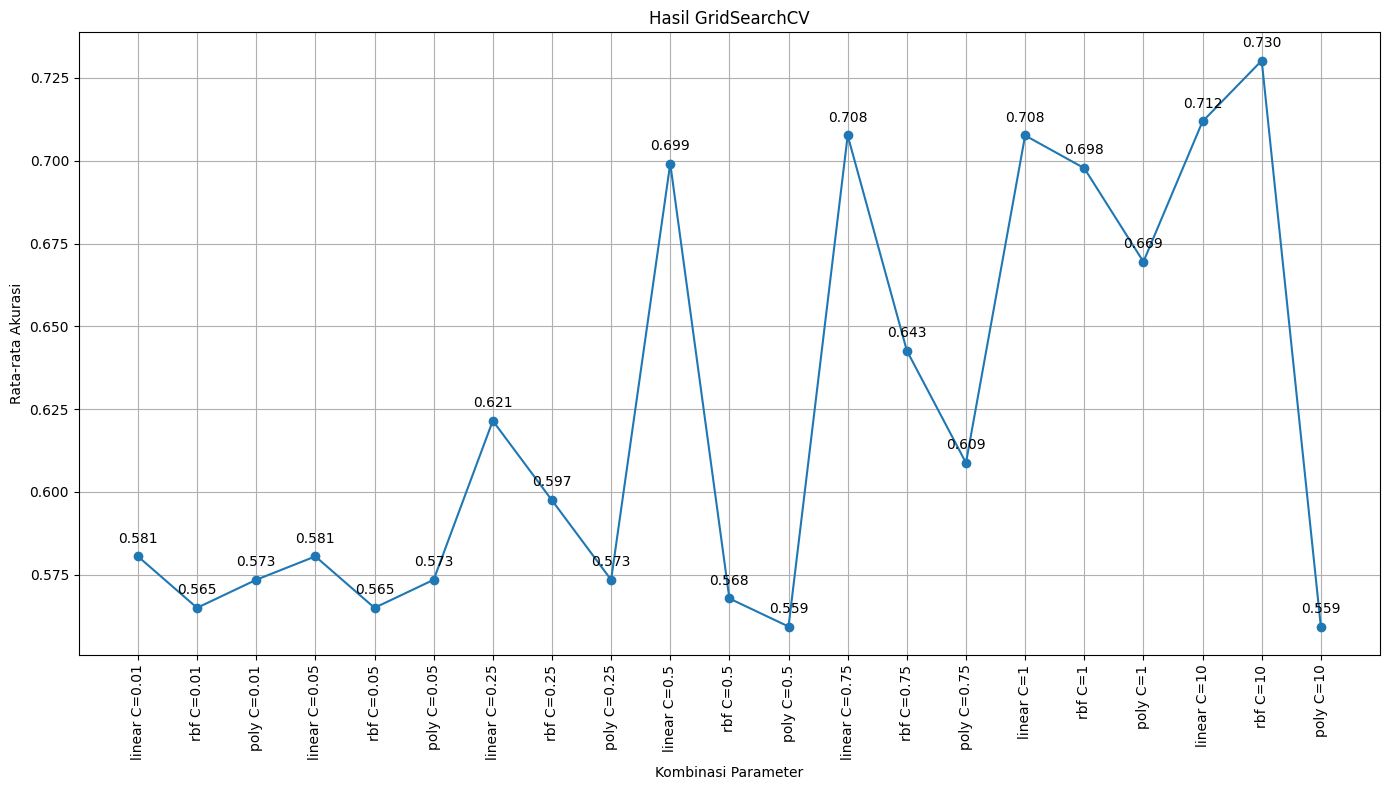

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Misalnya Anda sudah memuat data sebelumnya
# data = pd.read_csv("/path/to/your/csv_file.csv")

df = pd.DataFrame(data)

# Ubah label sentimen menjadi numerik
df['Sentiment'] = df['Sentiment'].map({'Negatif': 0, 'Positif': 1})

# Pisahkan fitur (Tweet) dan label (Sentiment)
X = df['Tweet']
y = df['Sentiment']

# Pisahkan data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konversi teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Terapkan SMOTE ke data training
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Periksa distribusi label sebelum dan setelah SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

print("\nDistribusi label setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Buat pipeline
pipeline = Pipeline([
    ('svm', SVC())
])

# Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'svm__C': [0.01, 0.05, 0.25, 0.5, 0.75, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

# Inisialisasi GridSearchCV dengan cv=3 dan error_score='raise'
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy', error_score='raise')

# Latih model menggunakan GridSearchCV
try:
    grid_search.fit(X_train_smote, y_train_smote)
    # Cetak parameter terbaik
    print("Best parameters found: ", grid_search.best_params_)
    # Evaluasi model pada test set
    y_pred = grid_search.predict(X_test_tfidf)
    print(classification_report(y_test, y_pred))
except Exception as e:
    print("An error occurred:", e)

# Ekstrak hasil dari GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Plot hasil GridSearchCV
plt.figure(figsize=(14, 8))

# Plot rata-rata skor validasi untuk tiap kombinasi parameter
mean_test_scores = results['mean_test_score']
params = results['params']

# Membuat label parameter
param_labels = []
for param in params:
    label = f"{param['svm__kernel']} C={param['svm__C']}"
    param_labels.append(label)

# Plotting
plt.plot(mean_test_scores, marker='o')
plt.xticks(ticks=np.arange(len(param_labels)), labels=param_labels, rotation=90)
plt.xlabel('Kombinasi Parameter')
plt.ylabel('Rata-rata Akurasi')
plt.title('Hasil GridSearchCV')
plt.grid(True)

# Tambahkan nilai rata-rata akurasi pada tiap titik
for i, txt in enumerate(mean_test_scores):
    plt.annotate(f"{txt:.3f}", (i, mean_test_scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()


## SVM

1. Hasil Akurasi dari GridSearchCV
Sebelum melakukan cross-validation, Anda harus mencantumkan hasil dari GridSearchCV untuk menunjukkan performa terbaik dari model dengan parameter yang dioptimalkan. Ini memberikan gambaran umum tentang kinerja model terbaik yang ditemukan oleh pencarian parameter.

Yang harus dicantumkan:

Parameter terbaik yang ditemukan oleh GridSearchCV.
Akurasi model dengan parameter terbaik pada test set.
Hasil dari classification report pada test set.

2. Hasil Cross-Validation
Hasil cross-validation memberikan gambaran tentang stabilitas dan generalisasi model di seluruh data pelatihan. Hasil ini sangat berguna untuk menunjukkan bahwa model tidak hanya cocok dengan data pelatihan tetapi juga dapat diandalkan pada data yang berbeda.

Yang harus dicantumkan:

Hasil classification report dari cross-validation pada data pelatihan.
Tabel atau grafik yang menunjukkan hasil cross-validation.

Best parameters found:  {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear', 'tfidf__max_df': 0.9, 'tfidf__ngram_range': (1, 2)}
              precision    recall  f1-score   support

           0       0.65      0.43      0.52        60
           1       0.71      0.86      0.78        98

    accuracy                           0.70       158
   macro avg       0.68      0.65      0.65       158
weighted avg       0.69      0.70      0.68       158

Cross-Validated Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.67      0.49      0.56       278
           1       0.67      0.81      0.73       354

    accuracy                           0.67       632
   macro avg       0.67      0.65      0.65       632
weighted avg       0.67      0.67      0.66       632



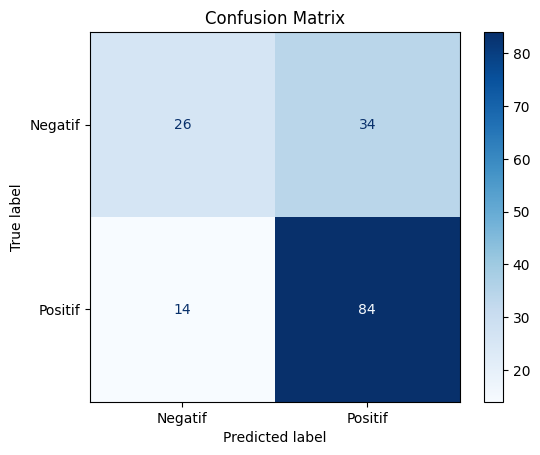

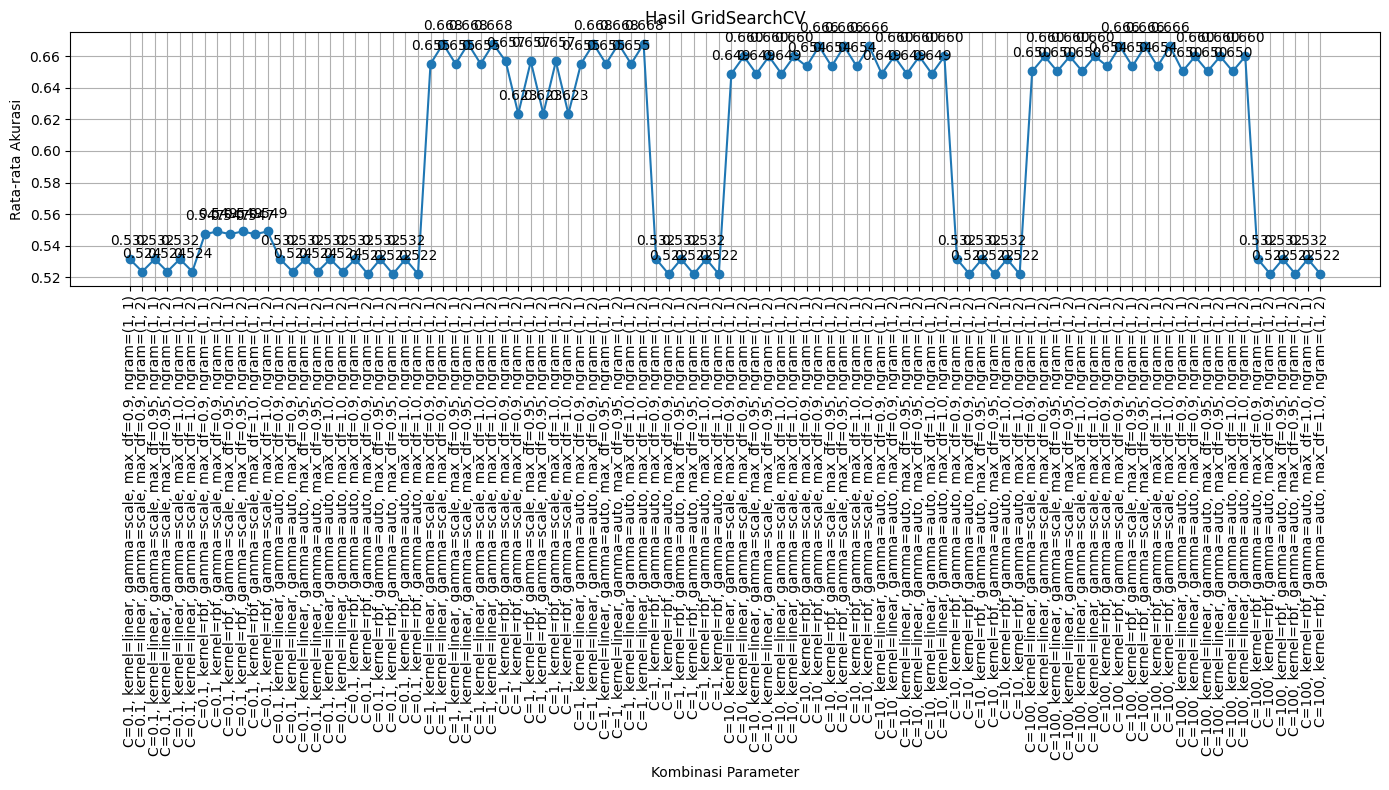

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(data)

# Ubah label sentimen menjadi numerik
df['Sentiment'] = df['Sentiment'].map({'Negatif': 0, 'Positif': 1})

# Pisahkan fitur (Tweet) dan label (Sentiment)
X = df['Tweet']
y = df['Sentiment']

# Pisahkan data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline dengan SMOTE
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC())
])

# Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'tfidf__max_df': [0.9, 0.95, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

# Inisialisasi GridSearchCV dengan cv=3 dan error_score='raise'
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy', error_score='raise')

# Latih model menggunakan GridSearchCV
try:
    grid_search.fit(X_train, y_train)
    # Cetak parameter terbaik
    print("Best parameters found: ", grid_search.best_params_)

    # Evaluasi model pada test set
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Cross-Validation dan Confusion Matrix
    y_train_pred_cv = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3)
    print("Cross-Validated Classification Report (Training Data):")
    print(classification_report(y_train, y_train_pred_cv))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif', 'Positif'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
except Exception as e:
    print("An error occurred:", e)

# Ekstrak hasil dari GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Plot hasil GridSearchCV
plt.figure(figsize=(14, 8))

# Plot rata-rata skor validasi untuk tiap kombinasi parameter
mean_test_scores = results['mean_test_score']
params = results['params']

# Membuat label parameter
param_labels = []
for param in params:
    label = f"C={param['svm__C']}, kernel={param['svm__kernel']}, gamma={param['svm__gamma']}, max_df={param['tfidf__max_df']}, ngram={param['tfidf__ngram_range']}"
    param_labels.append(label)

# Plotting
plt.plot(mean_test_scores, marker='o')
plt.xticks(ticks=np.arange(len(param_labels)), labels=param_labels, rotation=90)
plt.xlabel('Kombinasi Parameter')
plt.ylabel('Rata-rata Akurasi')
plt.title('Hasil GridSearchCV')
plt.grid(True)

# Tambahkan nilai rata-rata akurasi pada tiap titik
for i, txt in enumerate(mean_test_scores):
    plt.annotate(f"{txt:.3f}", (i, mean_test_scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()


## NAIVE BAIYES

Best parameters found:  {'nb__alpha': 10, 'tfidf__max_df': 0.9, 'tfidf__ngram_range': (1, 1)}
              precision    recall  f1-score   support

           0       0.49      0.45      0.47        60
           1       0.68      0.71      0.70        98

    accuracy                           0.61       158
   macro avg       0.59      0.58      0.58       158
weighted avg       0.61      0.61      0.61       158

Cross-Validated Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.62      0.59      0.60       278
           1       0.69      0.72      0.70       354

    accuracy                           0.66       632
   macro avg       0.65      0.65      0.65       632
weighted avg       0.66      0.66      0.66       632



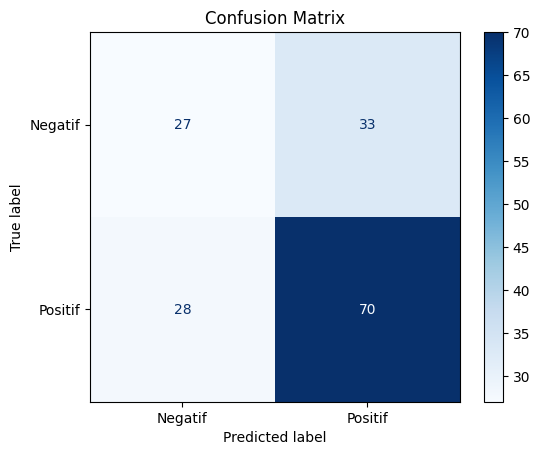

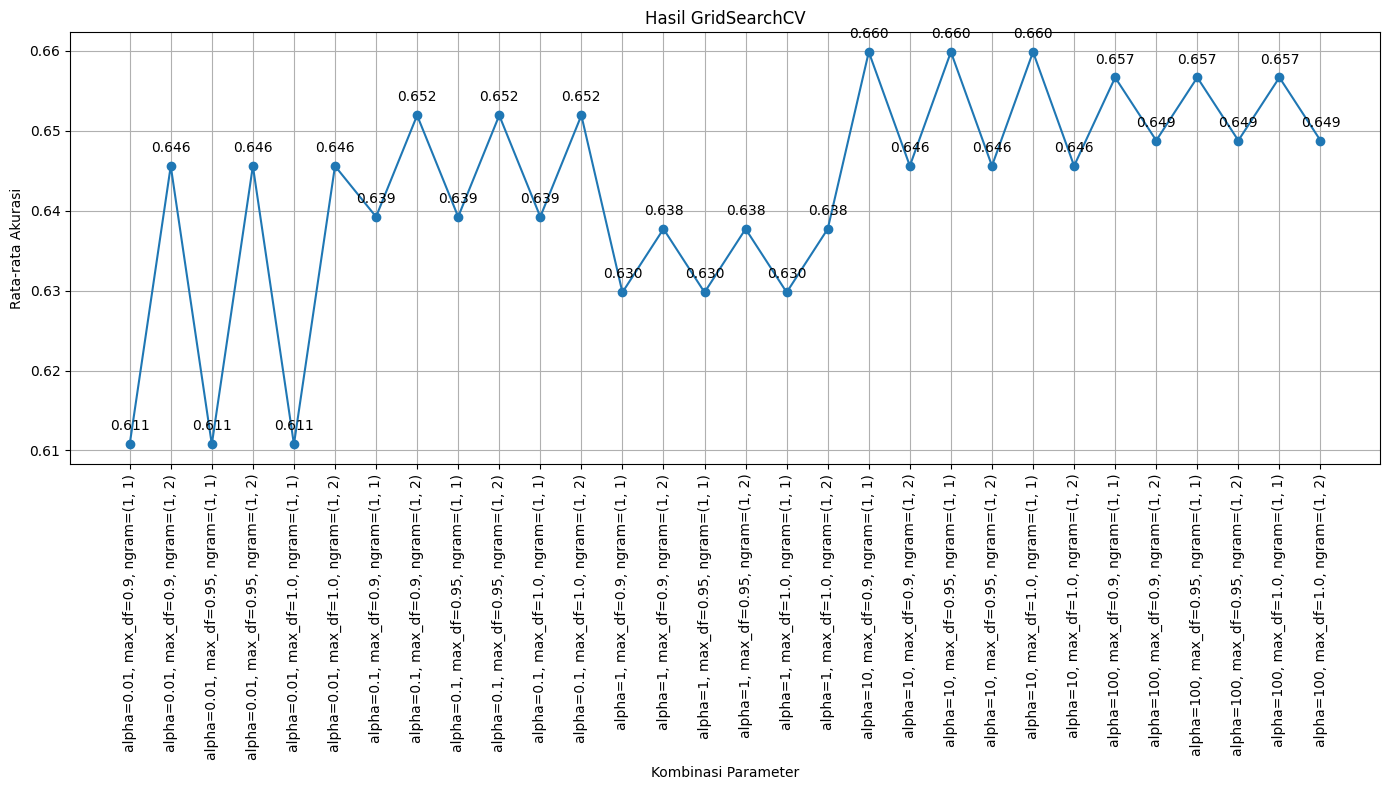

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Misalnya Anda sudah memuat data sebelumnya
# data = pd.read_csv("/path/to/your/csv_file.csv")

df = pd.DataFrame(data)

# Ubah label sentimen menjadi numerik
df['Sentiment'] = df['Sentiment'].map({'Negatif': 0, 'Positif': 1})

# Pisahkan fitur (Tweet) dan label (Sentiment)
X = df['Tweet']
y = df['Sentiment']

# Pisahkan data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline dengan SMOTE
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('nb', MultinomialNB())
])

# Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'tfidf__max_df': [0.9, 0.95, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.01, 0.1, 1, 10, 100]
}

# Inisialisasi GridSearchCV dengan cv=3 dan error_score='raise'
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy', error_score='raise')

# Latih model menggunakan GridSearchCV
try:
    grid_search.fit(X_train, y_train)
    # Cetak parameter terbaik
    print("Best parameters found: ", grid_search.best_params_)

    # Evaluasi model pada test set
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Cross-Validation dan Confusion Matrix
    y_train_pred_cv = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3)
    print("Cross-Validated Classification Report (Training Data):")
    print(classification_report(y_train, y_train_pred_cv))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif', 'Positif'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
except Exception as e:
    print("An error occurred:", e)

# Ekstrak hasil dari GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Plot hasil GridSearchCV
plt.figure(figsize=(14, 8))

# Plot rata-rata skor validasi untuk tiap kombinasi parameter
mean_test_scores = results['mean_test_score']
params = results['params']

# Membuat label parameter
param_labels = []
for param in params:
    label = f"alpha={param['nb__alpha']}, max_df={param['tfidf__max_df']}, ngram={param['tfidf__ngram_range']}"
    param_labels.append(label)

# Plotting
plt.plot(mean_test_scores, marker='o')
plt.xticks(ticks=np.arange(len(param_labels)), labels=param_labels, rotation=90)
plt.xlabel('Kombinasi Parameter')
plt.ylabel('Rata-rata Akurasi')
plt.title('Hasil GridSearchCV')
plt.grid(True)

# Tambahkan nilai rata-rata akurasi pada tiap titik
for i, txt in enumerate(mean_test_scores):
    plt.annotate(f"{txt:.3f}", (i, mean_test_scores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()
